In [1]:
import anndata
import scvelo as scv
import numpy as np
from scipy.stats import poisson
from pyrovelocity.api import train_model
from pyrovelocity.plot import plot_posterior_time, plot_gene_ranking,\
      vector_field_uncertainty, plot_vector_field_uncertain,\
      plot_mean_vector_field, project_grid_points,rainbowplot,denoised_umap,\
      us_rainbowplot, plot_arrow_examples
import os
import argparse
import time
import matplotlib.pyplot as plt
import torch
%load_ext autoreload
%autoreload 2

# Discrete Model
## 1. Data Preparation

In [2]:
dataset = 'Bonemarrow'
root = '/scratch/blaauw_root/blaauw1/gyichen'
data_path_base = f'{root}/data'
adata = anndata.read_h5ad(f"{data_path_base}/{dataset}_pp.h5ad")
adata.layers['raw_spliced']   = adata.layers['spliced']
adata.layers['raw_unspliced'] = adata.layers['unspliced']
adata.obs['u_lib_size_raw'] = adata.layers['raw_unspliced'].toarray().sum(-1)
adata.obs['s_lib_size_raw'] = adata.layers['raw_spliced'].toarray().sum(-1)

## 2. Train the model with a specific configuration

In [3]:
num_epochs = 4000
batch_size = -1
likelihood = 'Poisson'
input_type = 'raw'
train_size = 0.7

INFO     No batch_key inputted, assuming all cells are same batch                                                  
INFO     No label_key inputted, assuming all cells have same label                                                 
INFO     Using data from adata.layers["raw_unspliced"]                                                             
INFO     Using data from adata.layers["raw_spliced"]                                                               
INFO     Successfully registered anndata object containing 5028 cells, 2000 vars, 1 batches, 1 labels, and 0       
         proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


Anndata setup with scvi-tools version 0.13.0.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 5028  │
│             Vars             │ 2000  │
│            Labels            │   1   │
│           Batches            │   1   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   0   │
└──────────────────────────────┴───────┘

                 SCVI Data Registry                 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Data       ┃      scvi-tools Location      ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        X         │  adata.layers['raw_spliced']  │
│        U         │ adata.layers['raw_unspliced'] │
│      batch       │   adata.obs['_scvi_batch']    │
│      label       │   adata.obs['_scvi_labels']   │
│      ind_x       │     adata.obs['_indices']     │
│    u_lib_size    │    adata.obs['u_lib_size']    │
│    s_lib_size    │    adata.obs['s_lib_size']    │
│ u_lib_size_mean  │ adata.obs['u_lib_size_mean']  │
│ s_lib_size_mean  │ adata.obs['s_lib_size_mean']  │
│ u_lib_size_scale │ adata.obs['u_lib_size_scale'] │
│ s_lib_size_scale │ adata.obs['s_lib_size_scale'] │
└──────────────────┴───────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                       Batch Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

-----------
auto
auto_t0_constraint
train_faster_with_batch
step    1 loss = 6.92613e+07 patience = 45
step  100 loss = 5.14191e+07 patience = 45
step  200 loss = 4.34725e+07 patience = 44
step  300 loss = 3.68562e+07 patience = 45
step  400 loss = 3.01507e+07 patience = 44
step  500 loss = 2.4346e+07 patience = 45
step  600 loss = 1.95684e+07 patience = 45
step  700 loss = 1.60564e+07 patience = 45
step  800 loss = 1.40825e+07 patience = 44
step  900 loss = 1.33773e+07 patience = 40
step 1000 loss = 1.32466e+07 patience = 44
step 1100 loss = 1.3121e+07 patience = 43
step 1200 loss = 1.30025e+07 patience = 43
step 1300 loss = 1.29206e+07 patience = 45
step 1400 loss = 1.2794e+07 patience = 40
step 1500 loss = 1.27249e+07 patience = 45
step 1600 loss = 1.26498e+07 patience = 44
step 1700 loss = 1.26032e+07 patience = 45
step 1800 loss = 1.2529e+07 patience = 44
step 1900 loss = 1.24825e+07 patience = 45
step 2000 loss = 1.24397e+07 patience = 45
step 2100 loss = 1.24121e+07 patience = 3

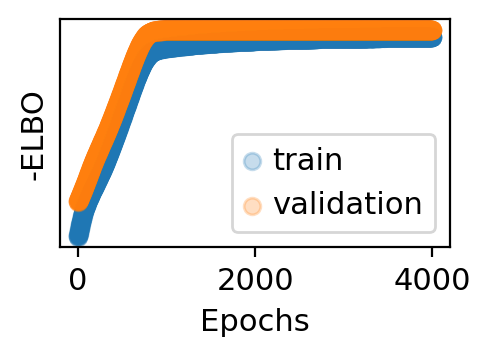

In [4]:
t_start = time.time()
pos_train, pos_test, train_idx, test_idx = train_model(adata,
                                                       max_epochs=num_epochs, 
                                                       svi_train=True, 
                                                       log_every=100,
                                                       patient_init=45,
                                                       batch_size=batch_size, 
                                                       use_gpu=0, 
                                                       likelihood=likelihood,
                                                       input_type=input_type,
                                                       cell_state='clusters',
                                                       include_prior=True,
                                                       offset=False,
                                                       library_size=True,
                                                       patient_improve=1e-3,
                                                       seed=2022,
                                                       guide_type='auto_t0_constraint',
                                                       train_size=train_size)
run_time = time.time()-t_start

## 3. Combine the results

In [5]:
pos = {}
for key in pos_train:
    n_sample = pos_train[key].shape[0]
    if(pos_train[key].shape[1]>1 and pos_train[key].shape[2]>1):
        val = np.zeros((n_sample, adata.n_obs, adata.n_vars))
        val[:,train_idx] = pos_train[key]
        val[:,test_idx] = pos_test[key]
        pos[key] = val
    elif(pos_train[key].shape[2]==1):
        val = np.zeros((n_sample, adata.n_obs, 1))
        val[:,train_idx] = pos_train[key]
        val[:,test_idx] = pos_test[key]
        pos[key] = val
    else:
        pos[key] = pos_train[key]

## 4. Compute Velocity

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 3/40 cores)


  0%|          | 0/5028 [00:00<?, ?cells/s]

    finished (0:00:25) --> added 
    'velocity_pyro_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_pyro_tsne', embedded velocity vectors (adata.obsm)


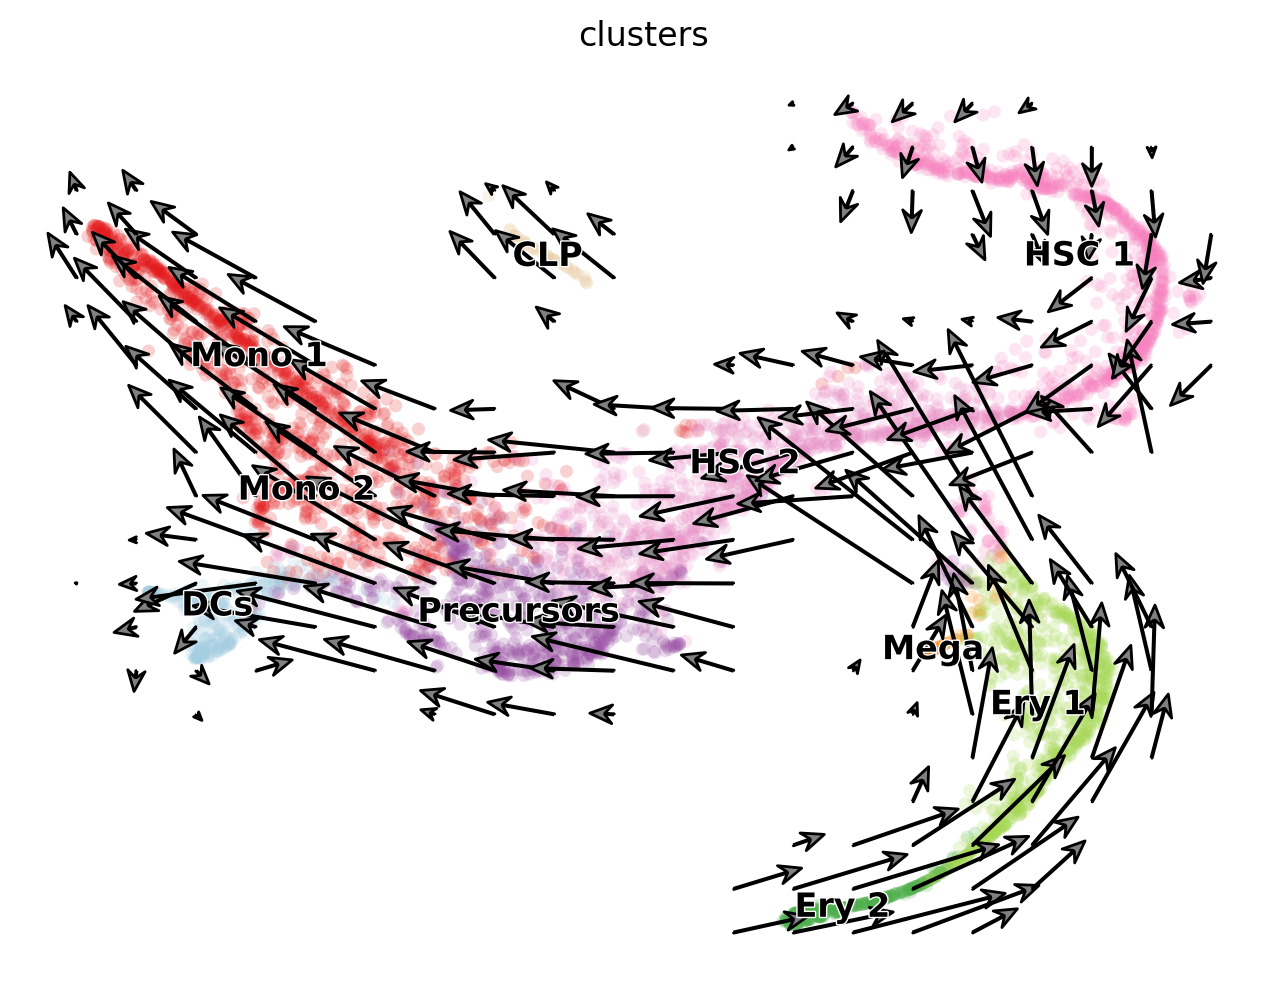

In [7]:
#Compute velocity
embed = "tsne"
figure_path = f'{root}/figures/{dataset}'

fig, ax = plt.subplots(figsize=(8, 6))
embed_mean = plot_mean_vector_field(pos,
                                    adata,
                                    ax=ax,
                                    basis=embed,
                                    n_jobs=(adata.n_obs)//2000+1)

## 5. Compute performance metrics and save results

In [8]:
def save_fitting(adata, pos_train, train_idx, pos_test=None, test_idx=None):
    split = not ((pos_test is None) or (test_idx is None))
    for key in pos_train:
        k,m,n = pos_train[key].shape
        if(m>1 and n>1):
            adata.layers[f'pv_{key}'] = np.zeros((adata.n_obs,n))
            adata.layers[f'pv_{key}'][train_idx] = pos_train[key].mean(0)
            if(split):
                adata.layers[f'pv_{key}'][test_idx] = pos_test[key].mean(0)
        elif(m>1):
            adata.obs[f'pv_{key}'] = np.zeros((adata.n_obs))
            adata.obs[f'pv_{key}'][train_idx] = pos_train[key].mean(0).squeeze()
            if(split):
                adata.obs[f'pv_{key}'][test_idx] = pos_test[key].mean(0).squeeze()
        elif(n>1):
            adata.var[f'pv_{key}'] = pos_train[key].mean(0).squeeze()
        else:
            adata.uns[f'pv_{key}'] = pos_train[key]

In [9]:
adata.obsm[f"pv_velocity_{embed}"] = embed_mean
del adata.obsm[f"velocity_pyro_{embed}"]
adata.layers["pv_shat"] = adata.layers["spliced_pyro"]
adata.layers["pv_uhat"] = np.zeros(adata.shape)
adata.layers["pv_uhat"][train_idx] = pos_train["u"].mean(0)
adata.layers["pv_uhat"][test_idx] = pos_test["u"].mean(0)
del adata.layers["spliced_pyro"]
adata.layers["pv_velocity"] = adata.layers["velocity_pyro"]
del adata.layers["velocity_pyro"]

adata.obs['pv_time'] = pos['cell_time'][:,:,0].mean(0).squeeze()
adata.uns['pv_train_idx'] = train_idx
adata.uns['pv_test_idx'] = test_idx
save_fitting(adata, pos_train, train_idx, pos_test, test_idx)

err_dic = {}
mse_train, mse_test, mae_train, mae_test, logp_train, logp_test = 0,0,0,0,0,0

for i in range(n_sample):
    dist_u_train = np.abs(adata.layers['raw_unspliced'][train_idx].A-pos_train['u'][i])
    dist_s_train = np.abs(adata.layers['raw_spliced'][train_idx].A-pos_train['s'][i])
    dist_u_test = np.abs(adata.layers['raw_unspliced'][test_idx].A-pos_test['u'][i])
    dist_s_test = np.abs(adata.layers['raw_spliced'][test_idx].A-pos_test['s'][i])
    mse_train += np.mean(dist_u_train**2+dist_s_train**2)
    mse_test += np.mean(dist_u_test**2+dist_s_test**2)
    mae_train += np.mean(dist_u_train+dist_s_train)
    mae_test += np.mean(dist_u_test+dist_s_test)
    logp_train += np.log(poisson.pmf(adata.layers['raw_unspliced'][train_idx].A, pos_train['ut'][i])+1e-10).sum(1).mean()\
                 +np.log(poisson.pmf(adata.layers['raw_spliced'][train_idx].A, pos_train['st'][i])+1e-10).sum(1).mean()
    logp_test += np.log(poisson.pmf(adata.layers['raw_unspliced'][test_idx].A, pos_test['ut'][i])+1e-10).sum(1).mean()\
                 +np.log(poisson.pmf(adata.layers['raw_spliced'][test_idx].A, pos_test['st'][i])+1e-10).sum(1).mean()

In [10]:
err_dic['MSE Train'] = mse_train / n_sample
err_dic['MSE Test'] = mse_test / n_sample
err_dic['MAE Train'] = mae_train / n_sample
err_dic['MAE Test'] = mae_test / n_sample
err_dic['LL Train'] = logp_train / n_sample
err_dic['LL Test'] = logp_test / n_sample
adata.uns['err'] = err_dic

In [11]:
err_dic

{'MSE Train': 3.1520928530832624,
 'MSE Test': 3.2798083940799643,
 'MAE Train': 0.7770459174007767,
 'MAE Test': 0.7185122376850012,
 'LL Train': -3897.7962724304757,
 'LL Test': -3836.3763024256145}

## Write to disk and plot results

In [12]:
data_path = f'{data_path_base}/pyro/discrete/{dataset}'
os.makedirs(data_path, exist_ok=True)
adata.write_h5ad(f'{data_path}/{dataset}.h5ad')

                    MAE
label                  
Poisson train  0.388523
Poisson valid  0.359256


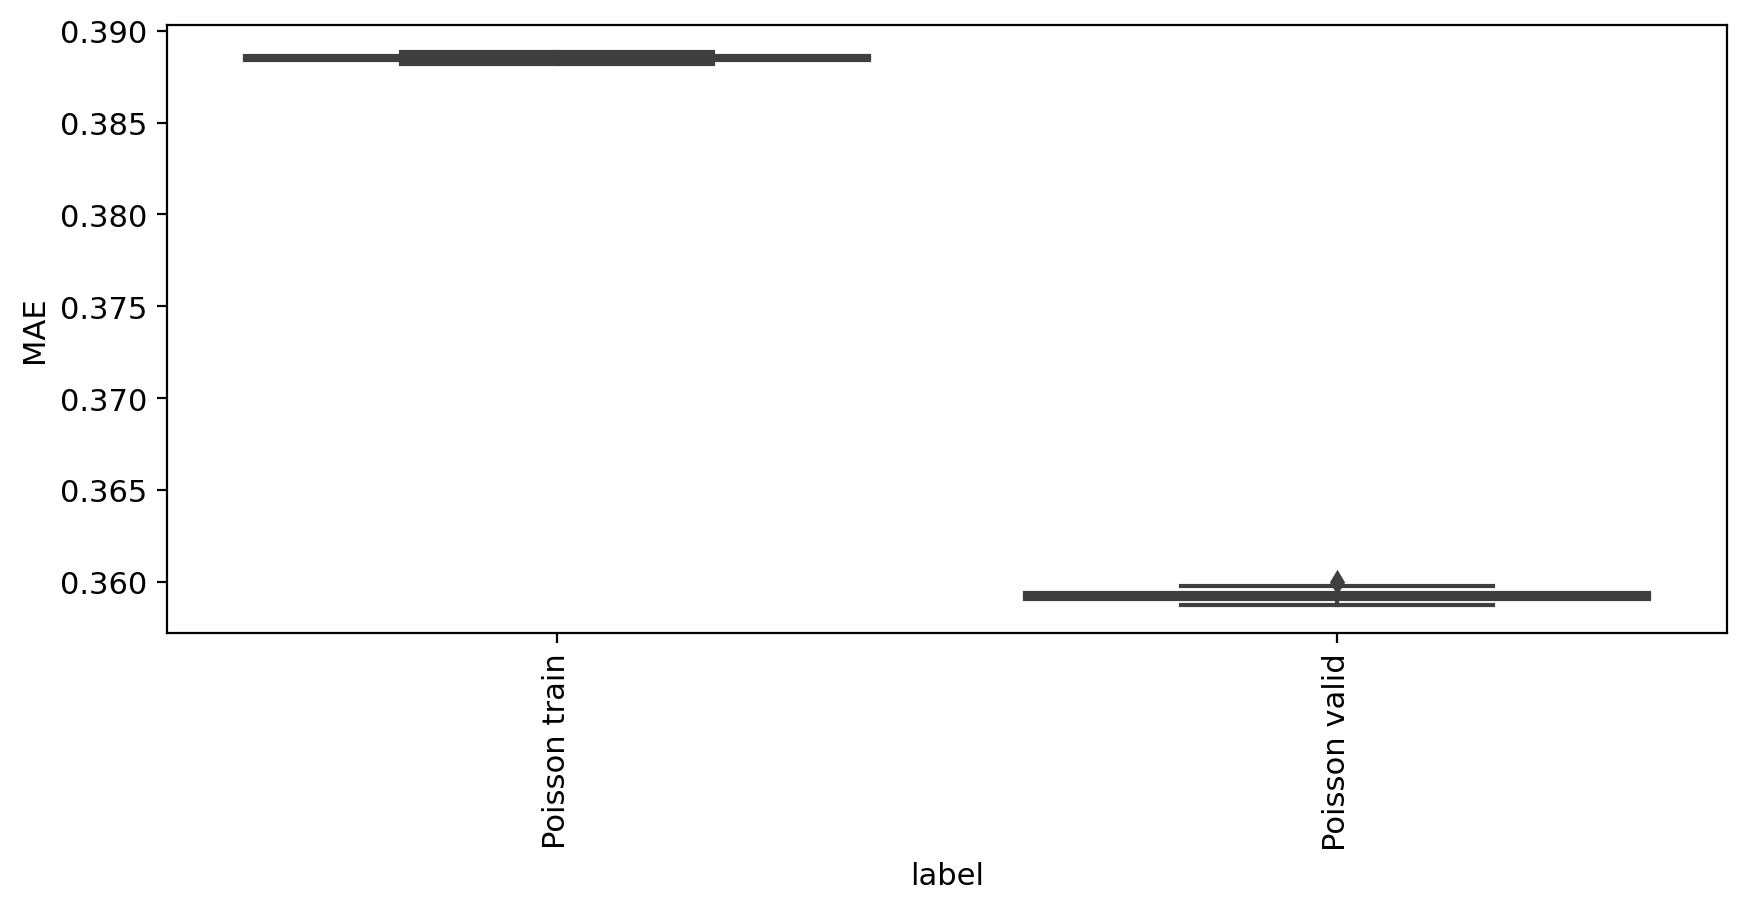

In [13]:
from pyrovelocity.utils import mae_evaluate
out = mae_evaluate((pos_train, pos_test, train_idx, test_idx), adata)

saving figure to file /scratch/blaauw_root/blaauw1/gyichen/figures/Bonemarrow/pv_vel_stream.png


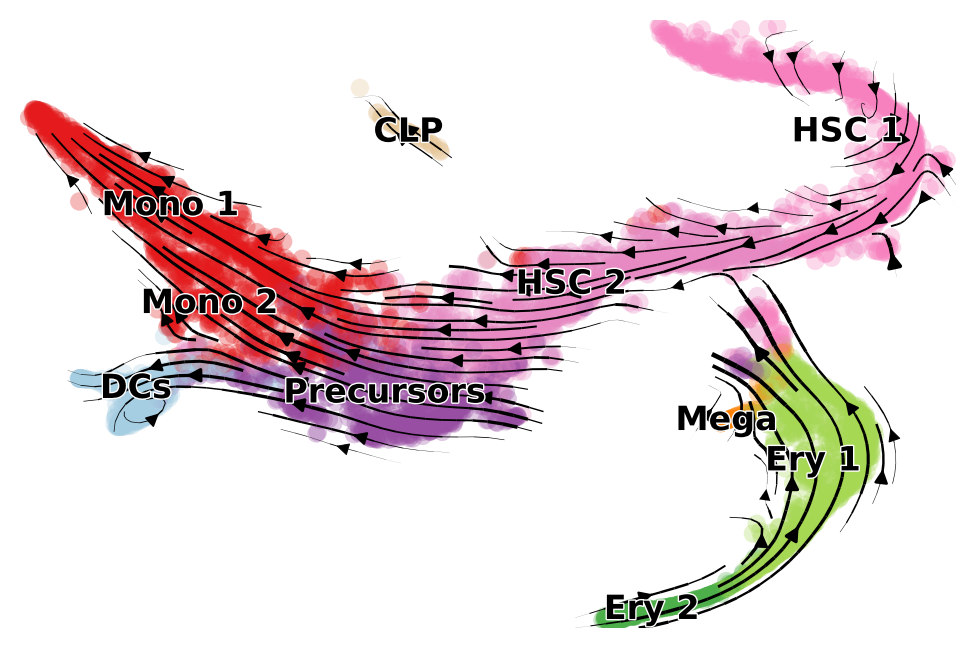

In [14]:
scv.pl.velocity_embedding_stream(adata,
                                 basis=embed,
                                 title='',
                                 vkey='pv_velocity',
                                 save=f'{figure_path}/pv_vel_stream.png')

saving figure to file /scratch/blaauw_root/blaauw1/gyichen/figures/Bonemarrow/pv_time.png


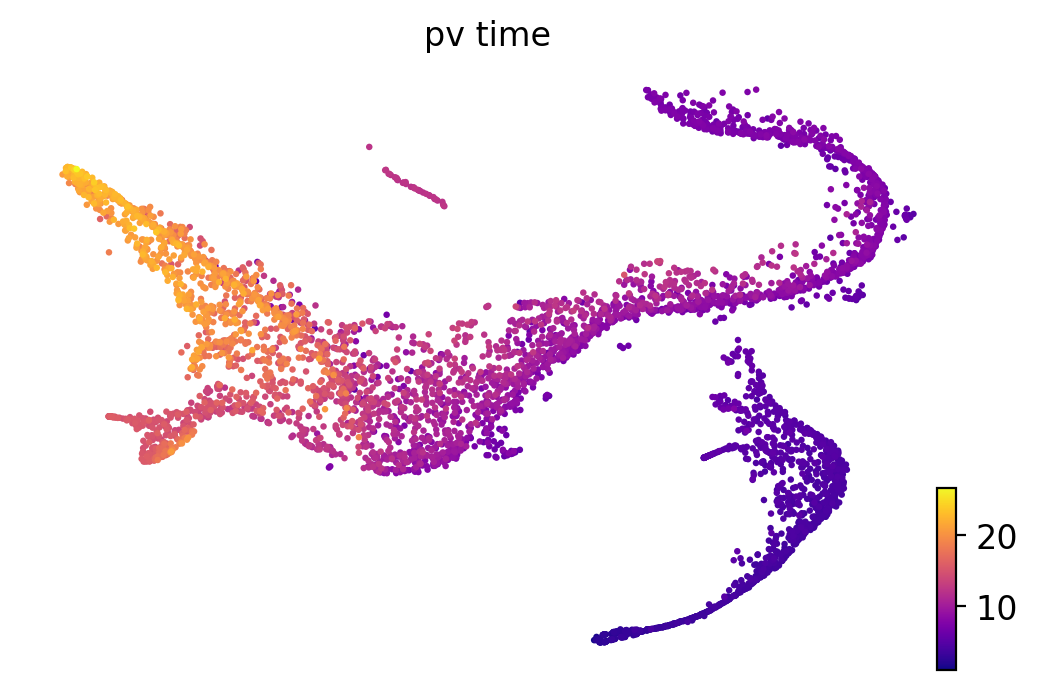

In [15]:
scv.pl.scatter(adata, basis=embed, color='pv_time', color_map='plasma', dpi=100, save=f'{figure_path}/pv_time.png')

In [16]:
del adata

# Continuous Model
## 1. Prepare Data

In [17]:
dataset = 'Bonemarrow'
root = '/scratch/blaauw_root/blaauw1/gyichen'
data_path_base = f'{root}/data'
adata = anndata.read_h5ad(f"{data_path_base}/{dataset}_pp.h5ad")

## 2. Train the model with a specific configuration

In [18]:
num_epochs = 4000
batch_size = -1
likelihood = 'Normal'
input_type = 'knn'
train_size = 0.7

INFO     No batch_key inputted, assuming all cells are same batch                                                  


INFO:scvi.data._anndata:No batch_key inputted, assuming all cells are same batch


INFO     No label_key inputted, assuming all cells have same label                                                 


INFO:scvi.data._anndata:No label_key inputted, assuming all cells have same label


INFO     Using data from adata.layers["Mu"]                                                                        


INFO:scvi.data._anndata:Using data from adata.layers["Mu"]


INFO     Using data from adata.layers["Ms"]                                                                        


INFO:scvi.data._anndata:Using data from adata.layers["Ms"]


INFO     Successfully registered anndata object containing 5028 cells, 2000 vars, 1 batches, 1 labels, and 0       
         proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.               


INFO:scvi.data._anndata:Successfully registered anndata object containing 5028 cells, 2000 vars, 1 batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                                                


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


Anndata setup with scvi-tools version 0.13.0.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 5028  │
│             Vars             │ 2000  │
│            Labels            │   1   │
│           Batches            │   1   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   0   │
└──────────────────────────────┴───────┘

                 SCVI Data Registry                 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Data       ┃      scvi-tools Location      ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        X         │      adata.layers['Ms']       │
│        U         │      adata.layers['Mu']       │
│      batch       │   adata.obs['_scvi_batch']    │
│      label       │   adata.obs['_scvi_labels']   │
│      ind_x       │     adata.obs['_indices']     │
│    u_lib_size    │    adata.obs['u_lib_size']    │
│    s_lib_size    │    adata.obs['s_lib_size']    │
│ u_lib_size_mean  │ adata.obs['u_lib_size_mean']  │
│ s_lib_size_mean  │ adata.obs['s_lib_size_mean']  │
│ u_lib_size_scale │ adata.obs['u_lib_size_scale'] │
│ s_lib_size_scale │ adata.obs['s_lib_size_scale'] │
└──────────────────┴───────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                       Batch Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

-----------
auto
auto_t0_constraint
train_faster_with_batch
step    1 loss = 4.5453e+07 patience = 45
step  100 loss = 1.13827e+07 patience = 45
step  200 loss = -2.39598e+06 patience = 44
step  300 loss = -9.84279e+06 patience = 45
step  400 loss = -1.3489e+07 patience = 45
step  500 loss = -1.51344e+07 patience = 43
step  600 loss = -1.64428e+07 patience = 44
step  700 loss = -1.71702e+07 patience = 45
step  800 loss = -1.75752e+07 patience = 45
step  900 loss = -1.79365e+07 patience = 45
step 1000 loss = -1.80576e+07 patience = 45
step 1100 loss = -1.82439e+07 patience = 45
step 1200 loss = -1.83203e+07 patience = 45
step 1300 loss = -1.84007e+07 patience = 45
step 1400 loss = -1.84345e+07 patience = 44
step 1500 loss = -1.85069e+07 patience = 45
step 1600 loss = -1.85384e+07 patience = 45
step 1700 loss = -1.85745e+07 patience = 45
step 1800 loss = -1.85932e+07 patience = 45
step 1900 loss = -1.86218e+07 patience = 45
step 2000 loss = -1.86503e+07 patience = 45
step 2100 loss = -1.

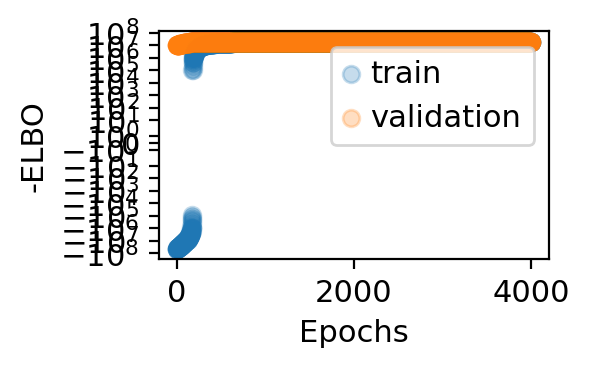

In [19]:
t_start = time.time()
pos_train, pos_test, train_idx, test_idx = train_model(adata,
                                                       max_epochs=num_epochs, 
                                                       svi_train=True, 
                                                       log_every=100,
                                                       patient_init=45,
                                                       batch_size=batch_size, 
                                                       use_gpu=0, 
                                                       likelihood=likelihood,
                                                       input_type=input_type,
                                                       cell_state='clusters',
                                                       include_prior=True,
                                                       offset=False,
                                                       library_size=True,
                                                       patient_improve=1e-3,
                                                       seed=2022,
                                                       guide_type='auto_t0_constraint',
                                                       train_size=train_size)
run_time = time.time()-t_start

## 3. Combine the results

In [20]:
#Combine the results
pos = {}
for key in pos_train:
    n_sample = pos_train[key].shape[0]
    if(pos_train[key].shape[1]>1 and pos_train[key].shape[2]>1):
        val = np.zeros((n_sample, adata.n_obs, adata.n_vars))
        val[:,train_idx] = pos_train[key]
        val[:,test_idx] = pos_test[key]
        pos[key] = val
    elif(pos_train[key].shape[2]==1):
        val = np.zeros((n_sample, adata.n_obs, 1))
        val[:,train_idx] = pos_train[key]
        val[:,test_idx] = pos_test[key]
        pos[key] = val
    else:
        pos[key] = pos_train[key]
pos['ut'] = pos['u']
pos['st'] = pos['s']

## 4. Compute Velocity

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 3/40 cores)


  0%|          | 0/5028 [00:00<?, ?cells/s]

    finished (0:00:57) --> added 
    'velocity_pyro_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_pyro_tsne', embedded velocity vectors (adata.obsm)


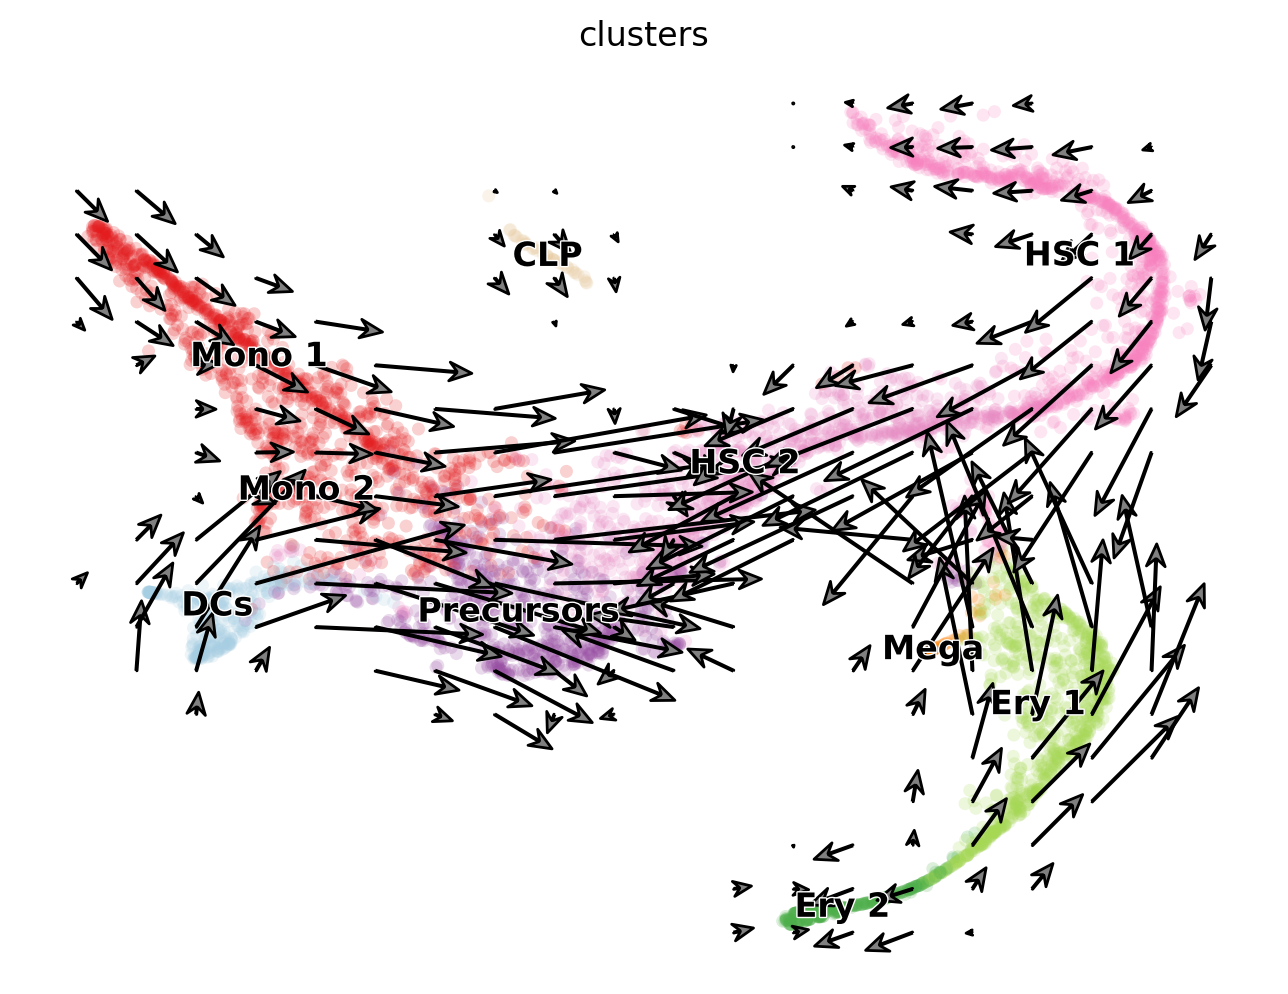

In [21]:
#Compute velocity
embed = "tsne"
figure_path = f'{root}/figures/{dataset}'

fig, ax = plt.subplots(figsize=(8, 6))
embed_mean = plot_mean_vector_field(pos,
                                    adata,
                                    ax=ax,
                                    basis=embed,
                                    n_jobs=(adata.n_obs)//2000+1)

## 5. Compute performance metrics and save results

In [22]:
def save_fitting(adata, pos_train, train_idx, pos_test=None, test_idx=None):
    split = not ((pos_test is None) or (test_idx is None))
    for key in pos_train:
        k,m,n = pos_train[key].shape
        if(m>1 and n>1):
            adata.layers[f'pv_{key}'] = np.zeros((adata.n_obs,n))
            adata.layers[f'pv_{key}'][train_idx] = pos_train[key].mean(0)
            if(split):
                adata.layers[f'pv_{key}'][test_idx] = pos_test[key].mean(0)
        elif(m>1):
            adata.obs[f'pv_{key}'] = np.zeros((adata.n_obs))
            adata.obs[f'pv_{key}'][train_idx] = pos_train[key].mean(0).squeeze()
            if(split):
                adata.obs[f'pv_{key}'][test_idx] = pos_test[key].mean(0).squeeze()
        elif(n>1):
            adata.var[f'pv_{key}'] = pos_train[key].mean(0).squeeze()
        else:
            adata.uns[f'pv_{key}'] = pos_train[key]

In [23]:
adata.obsm[f"pv_velocity_{embed}"] = embed_mean
del adata.obsm[f"velocity_pyro_{embed}"]
adata.layers["pv_shat"] = adata.layers["spliced_pyro"]
adata.layers["pv_uhat"] = np.zeros(adata.shape)
adata.layers["pv_uhat"][train_idx] = pos_train["u"].mean(0)
adata.layers["pv_uhat"][test_idx] = pos_test["u"].mean(0)
del adata.layers["spliced_pyro"]
adata.layers["pv_velocity"] = adata.layers["velocity_pyro"]
del adata.layers["velocity_pyro"]

adata.obs['pv_time'] = pos['cell_time'][:,:,0].mean(0).squeeze()
adata.uns['pv_train_idx'] = train_idx
adata.uns['pv_test_idx'] = test_idx
save_fitting(adata, pos_train, train_idx, pos_test, test_idx)

err_dic = {}
mse_train, mse_test, mae_train, mae_test, logp_train, logp_test = 0,0,0,0,0,0

for i in range(pos['u'].shape[0]):
    dist_u_train = np.abs(adata.layers['Mu'][train_idx]-pos_train['u'][i])
    dist_s_train = np.abs(adata.layers['Ms'][train_idx]-pos_train['s'][i])
    dist_u_test = np.abs(adata.layers['Mu'][test_idx]-pos_test['u'][i])
    dist_s_test = np.abs(adata.layers['Ms'][test_idx]-pos_test['s'][i])
    mse_train += np.mean(dist_u_train**2+dist_s_train**2)
    mse_test += np.mean(dist_u_test**2+dist_s_test**2)
    mae_train += np.mean(dist_u_train+dist_s_train)
    mae_test += np.mean(dist_u_test+dist_s_test)
    #MLE of variance
    var_s_train, var_s_test = np.var(adata.layers['Mu'][train_idx]-pos_train['u'][i],0),np.var(adata.layers['Ms'][train_idx]-pos_train['s'][i],0)
    var_u_train, var_u_test = np.var(adata.layers['Mu'][test_idx]-pos_test['u'][i],0),np.var(adata.layers['Ms'][test_idx]-pos_test['s'][i],0)
    logp_train += -dist_u_train**2/(2*var_u_train)-dist_s_train**2/(2*var_s_train) \
                - 0.5*np.log(var_u_train) - 0.5*np.log(var_s_train) - np.log(2*np.pi)
    logp_test += -dist_u_test**2/(2*var_u_test)-dist_s_test**2/(2*var_s_test) \
                - 0.5*np.log(var_u_test) - 0.5*np.log(var_s_test) - np.log(2*np.pi)

In [24]:
err_dic['MSE Train'] = mse_train / n_sample
err_dic['MSE Test'] = mse_test / n_sample
err_dic['MAE Train'] = mae_train / n_sample
err_dic['MAE Test'] = mae_test / n_sample
err_dic['LL Train'] = logp_train / n_sample
err_dic['LL Test'] = logp_test / n_sample
adata.uns['err'] = err_dic

In [25]:
err_dic

{'MSE Train': 1.4484212597211201,
 'MSE Test': 1.4450583815574647,
 'MAE Train': 0.3889799584945043,
 'MAE Test': 0.3870183308919271,
 'LL Train': array([[ 3.1095972 ,  1.820132  , -1.5013891 , ...,  2.9437554 ,
          1.1763684 ,  1.386109  ],
        [ 2.9186187 ,  1.7050431 , -2.2567365 , ...,  2.1658328 ,
          0.9679877 , -3.2276769 ],
        [ 3.1449325 ,  1.32118   , -1.5526159 , ...,  2.0010812 ,
          0.59021556,  1.5899316 ],
        ...,
        [ 2.7488976 ,  1.184573  , -1.5286689 , ..., -1.9931432 ,
          1.1610036 ,  0.80405694],
        [ 3.1090236 ,  1.998824  , -1.5261065 , ...,  3.1052628 ,
          1.2345765 ,  1.2059181 ],
        [ 2.9088783 ,  1.79771   , -1.4891778 , ...,  1.1765419 ,
          1.2167194 ,  1.1502154 ]], dtype=float32),
 'LL Test': array([[ 3.056938  ,  1.0096903 , -8.914478  , ...,  2.309314  ,
         -1.759519  ,  1.2284759 ],
        [ 2.7242882 ,  1.8988608 , -4.4274035 , ...,  2.4134214 ,
          0.95756924,  0.26457286

## Write to disk and plot results

In [26]:
data_path = f'{data_path_base}/pyro/continuous/{dataset}'
os.makedirs(data_path, exist_ok=True)
adata.write_h5ad(f'{data_path}/{dataset}.h5ad')

saving figure to file /scratch/blaauw_root/blaauw1/gyichen/figures/Bonemarrow/pv_vel_stream_normal.png


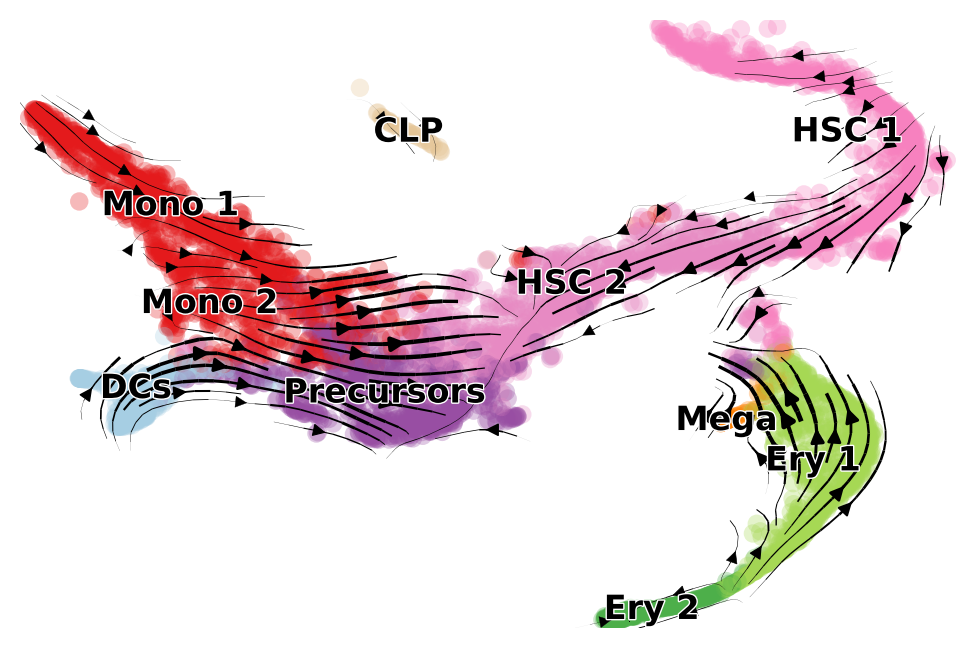

In [27]:
scv.pl.velocity_embedding_stream(adata,
                                 basis=embed,
                                 title='',
                                 vkey='pv_velocity',
                                 save=f'{figure_path}/pv_vel_stream_normal.png')

saving figure to file /scratch/blaauw_root/blaauw1/gyichen/figures/Bonemarrow/pv_time_normal.png


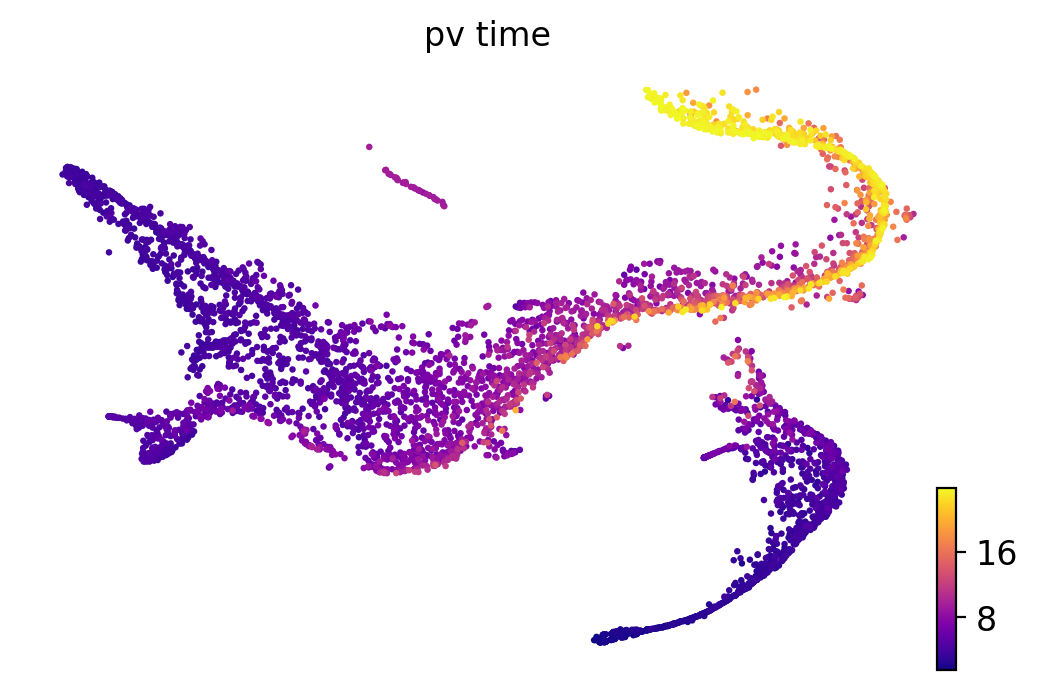

In [28]:
scv.pl.scatter(adata, basis=embed, color='pv_time', color_map='plasma', dpi=100, save=f'{figure_path}/pv_time_normal.png')